In [1]:
dataDict = np.load('datainput_FinerGrid.npy')[()]

In [2]:
qp.printDictKeys(dataDict)

dict_keys(['kinCube', 'potCube', 'dipCUBE', 'geoCUBE', 'phis', 'gams', 'thes'])


In [3]:
dataDict['kinCube'].shape, dataDict['potCube'].shape, dataDict['dipCUBE'].shape, dataDict['geoCUBE'].shape

((29, 21, 29, 9, 3),
 (29, 21, 29, 8),
 (29, 21, 29, 3, 8, 8),
 (29, 21, 29, 15, 3))

In [4]:
gsm_phi_ind = dataDict['phis'].index('P000-000')
gsm_gam_ind = dataDict['gams'].index('P016-923')
gsm_the_ind = dataDict['thes'].index('P114-804')

In [5]:
gsm_phi_ind, gsm_gam_ind, gsm_the_ind

(14, 10, 14)

In [6]:
from quantumpropagator import labTranformA

phis = labTranformA(dataDict['phis'])
gams = labTranformA(dataDict['gams'])
thes = labTranformA(dataDict['thes'])

In [7]:
dphi = phis[0] - phis[1]
dgam = gams[0] - gams[1]
dthe = thes[0] - thes[1]

In [8]:
from quantumpropagator import calc_g_G



In [9]:
gams

array([ 13.846,  14.154,  14.462,  14.769,  15.077,  15.385,  15.692,
        16.   ,  16.308,  16.615,  16.923,  17.231,  17.538,  17.846,
        18.154,  18.462,  18.769,  19.077,  19.385,  19.692,  20.   ])

In [10]:
thes

array([ 121.061,  120.615,  120.168,  119.721,  119.274,  118.827,
        118.38 ,  117.933,  117.486,  117.039,  116.592,  116.145,
        115.698,  115.251,  114.804,  114.358,  113.911,  113.464,
        113.017,  112.57 ,  112.123,  111.676,  111.229,  110.782,
        110.335,  109.888,  109.441,  108.994,  108.547])

In [11]:
dataDict['potCube'] = dataDict['potCube'][gsm_phi_ind,:,:]
dataDict['kinCube'] = dataDict['kinCube'][gsm_phi_ind,:,:]

In [12]:
dataDict['potCube'].shape, dataDict['kinCube'].shape,

((21, 29, 8), (21, 29, 9, 3))

In [13]:
#dataDict['potCube'] = dataDict['potCube'][:,0:20,:]
#dataDict['kinCube'] = dataDict['kinCube'][:,0:20,:]

In [14]:
dataDict['potCube'].shape, dataDict['kinCube'].shape, 

((21, 29, 8), (21, 29, 9, 3))

In [15]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from ipywidgets import interact#, interactive, fixed, interact_manual
import quantumpropagator as qp
import ipywidgets as widgets

def do3dplot(xs,ys,zss):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X,Y = np.meshgrid(ys,xs)
    #ax.plot_wireframe(X, Y, zss)
    ax.scatter(X, Y, zss)
    
def do3dplot2(X,Y,Z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #ax.plot_wireframe(X, Y, Z)
    ax.scatter(X, Y, Z)
    
def kinElem(mkelem,deriv):
    expl = '{}\'th order derivative coefficient in K matrix'.format(deriv)
    tis = ['Tpp','Tpg','Tpt','Tgp','Tgg','Tgt','Ttp','Ttg','Ttt']
    tisexpl = '{} -> '.format(tis[mkelem])
    print(tisexpl + expl)
    x = thes
    y = gams
    z = dataDict['kinCube'][:,:,mkelem,deriv]
    do3dplot(x,y,z)

## K matrix elements

In [16]:
interact(kinElem, mkelem = widgets.IntSlider(min=0,max=8,step=1,value=0), deriv = widgets.IntSlider(min=0,max=2,step=1,value=0));

interactive(children=(IntSlider(value=0, description='mkelem', max=8), IntSlider(value=0, description='deriv',…

In [17]:
def doubleArrayZ(array):
    Y = array
    N = len(Y)
    X = np.arange(0, 2*N, 2)
    X_new = np.arange(2*N-1)       # Where you want to interpolate
    Y_new = np.interp(X_new, X, Y) 
    return(Y_new)

In [19]:
from scipy.interpolate import Rbf

ground_state = dataDict['potCube'][:,:20,0]

ground_state.shape
allgams,allthes = np.meshgrid(gams, thes[:20])
rbf = Rbf(allgams, allthes, ground_state, epsilon=3)
XI, YI = (np.meshgrid(doubleArrayZ(gams)),doubleArrayZ(thes[:20]))
ZI = rbf(XI, YI)

do3dplot(thes[:20],gams,ground_state)

/home/alessio/config/miniconda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.1181292501387449e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


ValueError: Array lengths must be equal

In [20]:
do3dplot2(XI, YI, ZI)

NameError: name 'ZI' is not defined

In [21]:
(ZI.size,ground_state.size)

NameError: name 'ZI' is not defined

In [22]:
pote2d = dataDict['potCube'] - dataDict['potCube'].min()
print(pote2d[:,:,0].shape,gams.shape,thes.shape)

(21, 29) (21,) (29,)


<IPython.core.display.Javascript object>


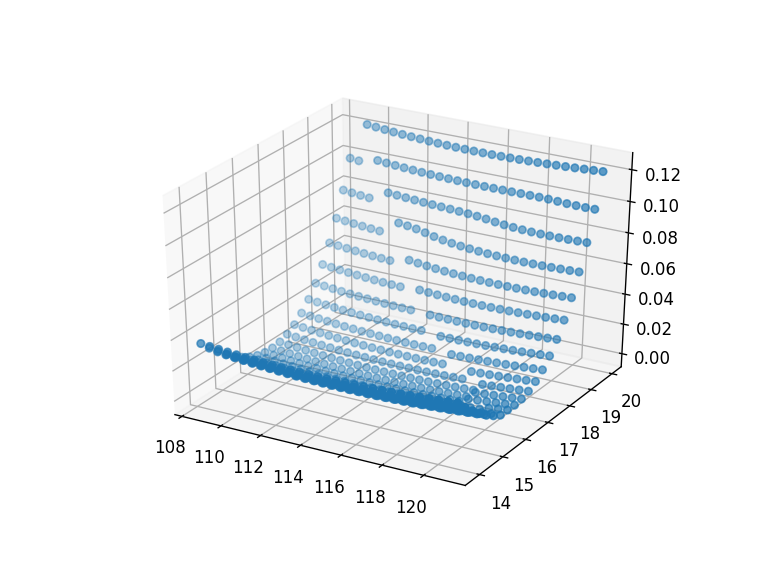

In [28]:
do3dplot(gams,thes,pote2d[:,:,0])

<IPython.core.display.Javascript object>


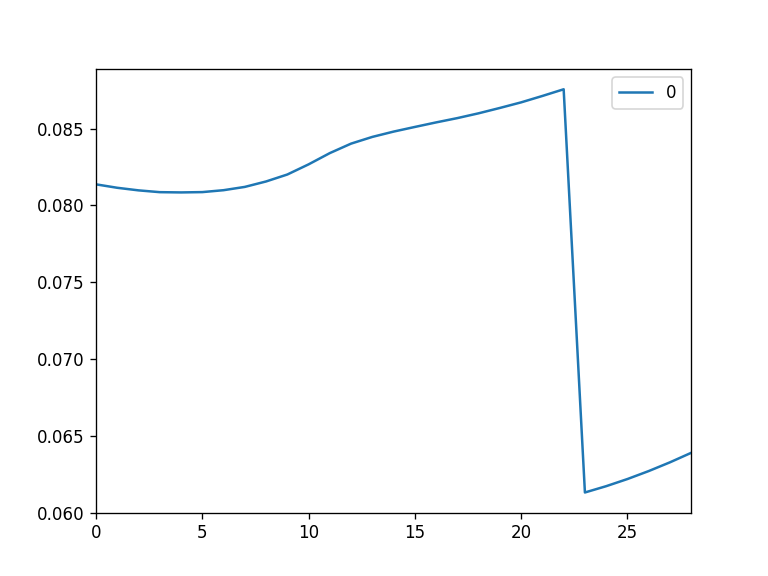

array([ 13.846,  14.154,  14.462,  14.769,  15.077,  15.385,  15.692,
        16.   ,  16.308,  16.615,  16.923,  17.231,  17.538,  17.846,
        18.154,  18.462,  18.769,  19.077,  19.385,  19.692,  20.   ])

In [24]:
a = pd.DataFrame(pote2d[-3,:,0])
a.plot()
gams

In [26]:
qp.fromHartoEv(0.087550-0.061337)

0.713292480626

In [36]:
pote2d[9,14,1]

0.2107272660362014

In [37]:
qp.fromEvtoHar(0.2107272660362014)

0.007744079517744176